# CSE 5526 Lab 1
## Author: Xuecheng Liu

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [112]:
# activation functions
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x)+np.exp(-x))

def tanh_derivative(x):
  return (2/(np.exp(x)+np.exp(-x)))*(2/(np.exp(x)+np.exp(-x)))

<function matplotlib.pyplot.show>

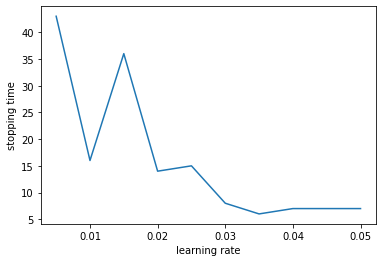

In [113]:
# 2 layer neural network with 7 input, 12 unit hidden layer and 1 output
# using tanh as activation and did not use moumentum
class NN1:
  def __init__(self, x, y):
    self.input = x
    self.y = y

    self.weights_1 = np.random.uniform(-1,1,(self.input.shape[1], 12))
    self.weights_2 = np.random.uniform(-1,1,(12, 1))
    self.output = np.zeros(self.y.shape)

  def feedforward(self):
    # forward layer 1
    self.layer1 = tanh(np.dot(self.input, self.weights_1))
    # forward layer 2
    self.output = tanh(np.dot(self.layer1, self.weights_2))

  def backprop(self,lr):
    # compute loss
    loss = np.power((self.output - self.y), 2)
    costs.append(np.mean(loss))

    # calculate gradient
    d_weights_2 = np.dot(self.layer1.T, (2*(self.y - self.output) * tanh_derivative(self.output)))
    d_weights_1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * tanh_derivative(self.output), self.weights_2.T) * tanh_derivative(self.layer1)))

    # update weight
    self.weights_1 += lr*d_weights_1 
    self.weights_2 += lr*d_weights_2

# using 4 input from 2^7 possible inputs, the last 1 in each row is the bias term
X = np.array([[1,1,1,1,1,1,1,1], [1,-1,1,1,1,1,1,1], [-1,1,1,1,1,1,1,1], [-1,1,1,-1,1,1,1,1]])
y = np.array([[1],[-1],[-1],[1]])

lr = np.linspace(0.005,0.05,10) # learning rate
stop = [] # store the times to reach convergence


for i in lr:
  nn1 = NN1(X,y)
  costs = []
  for j in range(1000):
    nn1.feedforward()
    nn1.backprop(i)
    if costs[len(costs)-1] < 0.1:
      stop.append(j)
      break

plt.plot(lr,stop)
plt.xlabel('learning rate')
plt.ylabel('stopping time')
plt.show

<function matplotlib.pyplot.show>

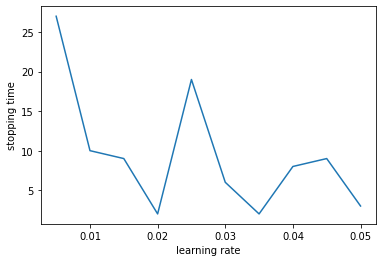

In [114]:
# 2 layer neural network with 7 input, 12 unit hidden layer and 1 output
# using tanh as activation with moumentum in update


class NN2:

  d_weights_1_p = np.zeros((7,12))
  d_weights_2_p = np.zeros((12,1))
  def __init__(self, x, y):
    self.input = x
    self.y = y

    self.weights_1 = np.random.uniform(-1,1,(self.input.shape[1], 12))
    self.weights_2 = np.random.uniform(-1,1,(12, 1))
    self.output = np.zeros(self.y.shape)

  def feedforward(self):
    # forward layer 1
    self.layer1 = tanh(np.dot(self.input, self.weights_1))
    # forward layer 2
    self.output = tanh(np.dot(self.layer1, self.weights_2))

  def backprop(self,lr):
    d_weights_1_p = np.zeros((7,12))
    d_weights_2_p = np.zeros((12,1))
    # compute loss
    loss = np.power((self.output - self.y), 2)
    costs.append(np.mean(loss))

    # calculate gradient
    d_weights_2 = np.dot(self.layer1.T, (2*(self.y - self.output) * tanh_derivative(self.output)))
    d_weights_1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * tanh_derivative(self.output), self.weights_2.T) * tanh_derivative(self.layer1)))

    
    # update weight
    self.weights_1 += lr*d_weights_1 + 0.8*d_weights_1_p
    self.weights_2 += lr*d_weights_2 + 0.8*d_weights_2_p

    d_weights_1_p = d_weights_1
    d_weights_2_p = d_weights_2

# using 4 input from 2^7 possible inputs
X = np.array([[1,1,1,1,1,1,1], [1,-1,1,1,1,1,1], [-1,1,1,1,1,1,1], [-1,1,1,-1,1,1,1]])
y = np.array([[1],[-1],[-1],[1]])

lr = np.linspace(0.005,0.05,10) # learning rate
stop = [] # store the times to reach convergence


for i in lr:
  nn1 = NN2(X,y)
  costs = []
  for j in range(1000):
    nn1.feedforward()
    nn1.backprop(i)
    if costs[len(costs)-1] < 0.1:
      stop.append(j)
      break

plt.plot(lr,stop)
plt.xlabel('learning rate')
plt.ylabel('stopping time')
plt.show

<function matplotlib.pyplot.show>

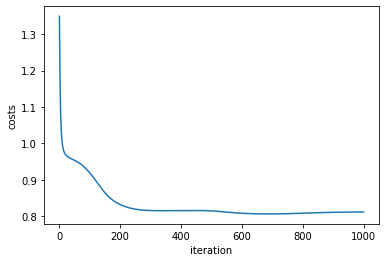

In [129]:
# 2 layer neural network with 7 input, 12 unit hidden layer and 1 output
# using sigmoid as activation and did not use moumentum

class NN3:
  def __init__(self, x, y):
    self.input = x
    self.y = y

    self.weights_1 = np.random.uniform(-1,1,(self.input.shape[1], 12))
    self.weights_2 = np.random.uniform(-1,1,(12, 1))
    self.output = np.zeros(self.y.shape)

  def feedforward(self):
    # forward layer 1
    self.layer1 = sigmoid(np.dot(self.input, self.weights_1))
    # forward layer 2
    self.output = sigmoid(np.dot(self.layer1, self.weights_2))

  def backprop(self,lr):
    # compute loss
    loss = np.power((self.output - self.y), 2)
    costs.append(np.mean(loss))

    # calculate gradient
    d_weights_2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
    d_weights_1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights_2.T) * sigmoid_derivative(self.layer1)))

    # update weight
    self.weights_1 += lr*d_weights_1 
    self.weights_2 += lr*d_weights_2

# using 4 input from 2^7 possible inputs
X = np.array([[1,1,1,1,1,1,1,1], [1,-1,1,1,1,1,1,1], [-1,1,1,1,1,1,1,1], [-1,1,1,-1,1,1,1,1]])
y = np.array([[1],[-1],[-1],[1]])

lr = np.linspace(0.005,0.05,10) # learning rate
stop = [] # store the times to reach convergence


for i in lr:
  nn1 = NN3(X,y)
  costs = []
  for j in range(1000):
    nn1.feedforward()
    nn1.backprop(i)
    if costs[len(costs)-1] < 0.1:
      stop.append(j)
      break

plt.plot(np.linspace(1,1000,1000),costs)
plt.xlabel('iteration')
plt.ylabel('costs')
plt.show

0.7996621965991652

<function matplotlib.pyplot.show>

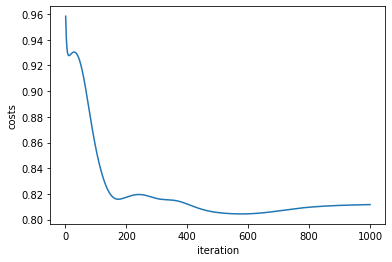

In [131]:
# 2 layer neural network with 7 input, 12 unit hidden layer and 1 output
# using sigmoid as activation and did not use moumentum

class NN4:
  def __init__(self, x, y):
    self.input = x
    self.y = y

    self.weights_1 = np.random.uniform(-1,1,(self.input.shape[1], 12))
    self.weights_2 = np.random.uniform(-1,1,(12, 1))
    self.output = np.zeros(self.y.shape)

  def feedforward(self):
    # forward layer 1
    self.layer1 = sigmoid(np.dot(self.input, self.weights_1))
    # forward layer 2
    self.output = sigmoid(np.dot(self.layer1, self.weights_2))

  def backprop(self,lr):
    d_weights_1_p = np.zeros((8,12))
    d_weights_2_p = np.zeros((12,1))
    # compute loss
    loss = np.power((self.output - self.y), 2)
    costs.append(np.mean(loss))

    # calculate gradient
    d_weights_2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
    d_weights_1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights_2.T) * sigmoid_derivative(self.layer1)))

    # update weight
    self.weights_1 += lr*d_weights_1 + 0.8*d_weights_1_p
    self.weights_2 += lr*d_weights_2 + 0.8*d_weights_2_p

    d_weights_1_p = d_weights_1
    d_weights_2_p = d_weights_2

# using 4 input from 2^7 possible inputs
X = np.array([[1,1,1,1,1,1,1,1], [1,-1,1,1,1,1,1,1], [-1,1,1,1,1,1,1,1], [-1,1,1,-1,1,1,1,1]])
y = np.array([[1],[-1],[-1],[1]])

lr = np.linspace(0.005,0.05,10) # learning rate
stop = [] # store the times to reach convergence


for i in lr:
  nn1 = NN4(X,y)
  costs = []
  for j in range(1000):
    nn1.feedforward()
    nn1.backprop(i)
    if costs[len(costs)-1] < 0.1:
      stop.append(j)
      break

plt.plot(np.linspace(1,1000,1000),costs)
plt.xlabel('iteration')
plt.ylabel('costs')
plt.show